In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [5]:
data = pd.read_csv(r"C:\Users\pulla\Downloads\creditcard.csv")

In [6]:
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [8]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


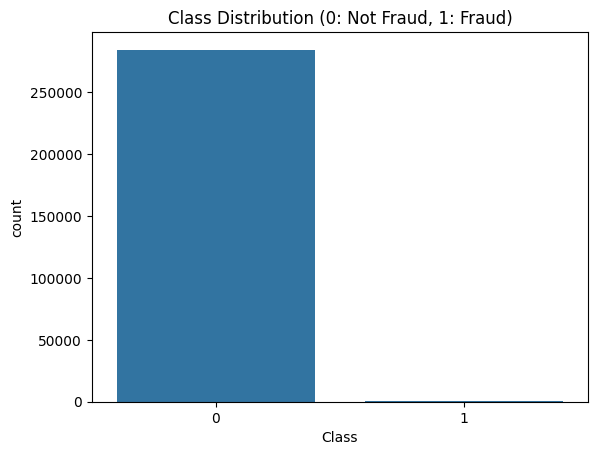

In [10]:
# Check the distribution of the target variable 'Class'
print(data['Class'].value_counts())

# Plot the distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Not Fraud, 1: Fraud)')
plt.show()


In [12]:
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (227845, 30)
Test data shape: (56962, 30)


In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

Accuracy: 99.96%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



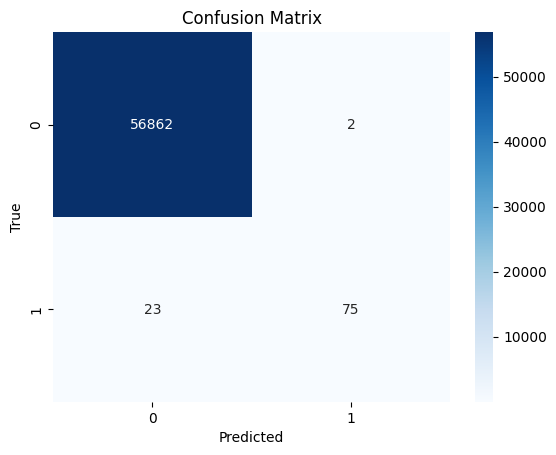

In [14]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(Y_test, Y_pred))
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
fraud_cases = data[data['Class'] == 1]
non_fraud_cases = data[data['Class'] == 0]
non_fraud_sample = non_fraud_cases.sample(len(fraud_cases))
balanced_data = pd.concat([non_fraud_sample, fraud_cases])
X_balanced = balanced_data.drop('Class', axis=1)
Y_balanced = balanced_data['Class']
X_train_balanced, X_test_balanced, Y_train_balanced, Y_test_balanced = train_test_split(X_balanced, Y_balanced, test_size=0.2, random_state=42)
model_balanced = RandomForestClassifier(random_state=42)
model_balanced.fit(X_train_balanced, Y_train_balanced)
Y_pred_balanced = model_balanced.predict(X_test_balanced)
accuracy_balanced = accuracy_score(Y_test_balanced, Y_pred_balanced)
print(f"Balanced Accuracy: {accuracy_balanced * 100:.2f}%")
print("Classification Report (Balanced):\n", classification_report(Y_test_balanced, Y_pred_balanced))


Balanced Accuracy: 93.40%
Classification Report (Balanced):
               precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



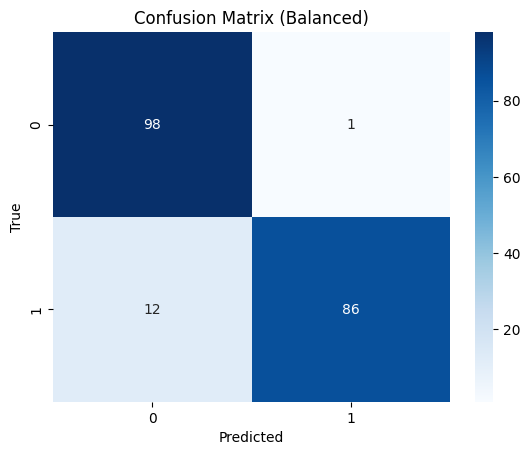

In [17]:
conf_matrix_balanced = confusion_matrix(Y_test_balanced, Y_pred_balanced)
sns.heatmap(conf_matrix_balanced, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Balanced)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()